# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

## Solucion

In [2]:
##
## Carga los datos
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = pd.read_csv('datos/diabetes.csv')
##
##Verifiva la lectura de los datos
##
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


 Para determinar que variables son necesarias buscamos una correlacion entre ellas para mirar si podemos borrar alguna.

In [3]:
corr = diabetes.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Hacemos un plot para mirar mejor esta correlacion

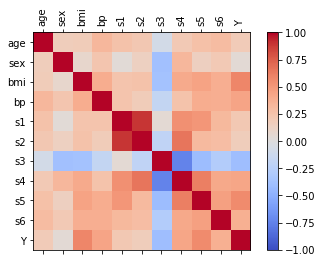

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1,vmax =1)
fig.colorbar(cax)
ticks = np.arange(0,len(diabetes.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(diabetes.columns)
ax.set_yticklabels(diabetes.columns)
plt.show()

En el grafico podemos ver que las variables s1 y s2 se parecen mucho, por lo tanto podemos obviar una de estas

Para determinar cual obviar, hacemos un grafico de importancia usando la recursive feature elimination

C:\Users\jfmdd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


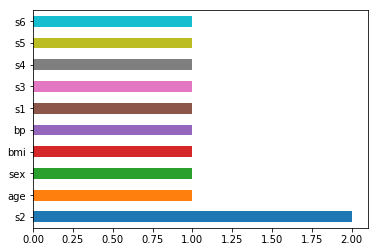

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

diabetes_data = diabetes.drop(['Y'],axis=1)
diabetes_target = diabetes[['Y']]

model = LogisticRegression()
rfe = RFE(model,9)
rfe = rfe.fit(diabetes_data,diabetes_target)

plt_importances = pd.Series(rfe.ranking_, index = diabetes_data.columns)
plt_importances.nlargest(10).plot(kind='barh')
plt.show()

Como vemos, s1 y s2 estan muy correlacioneados entre si, y s2 no importa tanto para este problema por lo tanto podemos eliminar s2 del dataset.

In [7]:
diabetes_data = diabetes.drop(['s2','Y'],axis=1)
diabetes_data.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031991,-0.046641


## Transformacion Linear  y modelo de regreasion linear base

Ya con el dataset depurado, procedemos a hacer el modelo de regresión linear, adicional a este veremos si al aplicar alguna transformacion lineal el modelo se optimiza

### Modelo lineal sin transformar

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

data_train, data_test, target_train, target_test = train_test_split(diabetes_data,diabetes_target, test_size=0.30)

linearModel = linear_model.LinearRegression()
linearModel.fit(data_train,target_train)

Linear_predictions = linearModel.predict(data_test)
print('Metricas modelo sin transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,Linear_predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,Linear_predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,Linear_predictions)))


Metricas modelo sin transfromacion
Error absoluto de la media: 43.70023047871664
Error cuadratico de la media: 2881.353474917315
Error cuadratico de la respuesta: 53.67824023677858


### Transformacion cuadrada

In [9]:
squareTransform = lambda x:x**2

dataFrameTransformed = diabetes_data.apply(squareTransform)
targetTransformed = diabetes_target.apply(squareTransform)

data_train, data_test, target_train, target_test = train_test_split(dataFrameTransformed,targetTransformed, test_size=0.30)

linearModel = linear_model.LinearRegression()
model = linearModel.fit(data_train,target_train)

predictions = linearModel.predict(data_test)
print('Metricas modelo con transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,predictions)))


Metricas modelo con transfromacion
Error absoluto de la media: 20007.996279610623
Error cuadratico de la media: 665541653.6801909
Error cuadratico de la respuesta: 25798.093993165287


### Transformacion cubica

In [10]:
cubicTransform = lambda x:x**3

dataFrameTransformed = diabetes_data.apply(cubicTransform)
targetTransformed = diabetes_target.apply(cubicTransform)

data_train, data_test, target_train, target_test = train_test_split(dataFrameTransformed,targetTransformed, test_size=0.30)

linearModel = linear_model.LinearRegression()
model = linearModel.fit(data_train,target_train)

predictions = linearModel.predict(data_test)
print('Metricas modelo con transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,predictions)))


Metricas modelo con transfromacion
Error absoluto de la media: 4724371.147556254
Error cuadratico de la media: 46005691453433.08
Error cuadratico de la respuesta: 6782749.5496614855


### Transformacion exponencial

In [11]:
exponentialTransform = lambda x:np.exp(x)

dataFrameTransformed = diabetes_data.apply(exponentialTransform)
targetTransformed = diabetes_target.apply(exponentialTransform)

data_train, data_test, target_train, target_test = train_test_split(dataFrameTransformed,targetTransformed, test_size=0.30)

linearModel = linear_model.LinearRegression()
model = linearModel.fit(data_train,target_train)

predictions = linearModel.predict(data_test)
print('Metricas modelo con transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,predictions)))


Metricas modelo con transfromacion
Error absoluto de la media: 1.913956173339333e+148
Error cuadratico de la media: 6.186501192145453e+296
Error cuadratico de la respuesta: 2.4872678167309313e+148


### Conclusiones


Los errores cuando se aplica alguna transformacion al los datos son muy altos, por lo tanto no se debe hacer. Se recomienda trabajar los datos sin aplicar transformaciones.

## Red neuronal

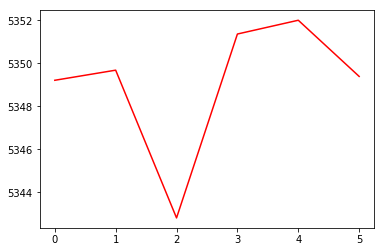

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_train, data_test, target_train, target_test = train_test_split(diabetes_data,diabetes_target, test_size=0.30)

history_nn = []

neurons = [2,4,8,16,32,64]

for h in neurons:

    ## crea el modelo vacio
    model = tf.keras.Sequential()

    ## capa oculta
    model.add(tf.keras.layers.Dense(h,                         # neuronas en la capa oculta
                                    activation=tf.nn.relu,  # función de activación
                                    input_shape = (9,)))       # una neurona de entrada

    ## capa de salida
    model.add(tf.keras.layers.Dense(1,                         # una neurona de salida
                                    activation='linear')) # capa de salida

    ## optimizacion usando gradiente
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

    ## crea el modelo
    model.compile(optimizer=optimizer,     # optimizador
                  loss='mse',              # función a minimizar
                  metrics=['mse'])  # metricas a reportar

    ## entrena el modelo y guarda
    ## el reporte de entrenamiento
    model.fit(data_train, target_train, epochs=5000, verbose=0)

    ## error de entrenamiento
    y = [u[0] for u in model.predict(data_test).tolist()]
    history_nn.append(metrics.mean_squared_error(target_test,y))


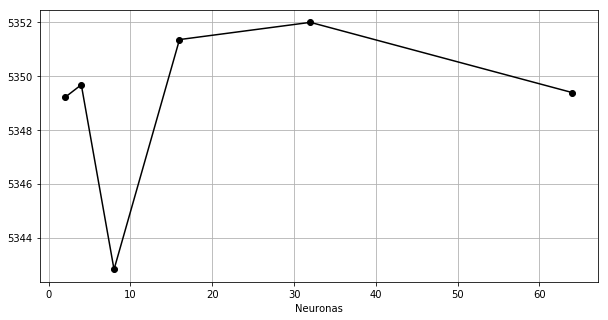

In [21]:
plt.figure(figsize=(10,5))
plt.xlabel('Neuronas')
plt.plot(neurons, history_nn, 'ko-')
plt.grid()

Se estima que con 7 u 8 neuronas el modelo puede hacer una prediccion acertada

## Comparacion resultados 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

diabetes = pd.read_csv('datos/diabetes.csv')

diabetes_data = diabetes.drop(['s2','Y'],axis=1)
diabetes_target = diabetes[['Y']]
data_train, data_test, target_train, target_test = train_test_split(diabetes_data,diabetes_target, test_size=0.30)


In [25]:
from sklearn import linear_model
from sklearn import metrics

linearModel = linear_model.LinearRegression()
linearModel.fit(data_train,target_train)

linearPredictions = linearModel.predict(data_test)

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
## crea el modelo vacio
model = tf.keras.Sequential()

## capa oculta
model.add(tf.keras.layers.Dense(8,                   # neuronas en la capa oculta
                                activation=tf.nn.relu, # función de activación
                                input_shape = (9,)))    # una neurona de entrada

## capa de salida
model.add(tf.keras.layers.Dense(1,                   # una neurona de salida
                                activation='linear')) # capa de salida

## optimizacion usando gradiente
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## crea el modelo
model.compile(optimizer=optimizer,     # optimizador
                loss='mse',              # función a minimizar
                metrics=['mse'])  # metricas a reportar

## entrena el modelo y guarda
## el reporte de entrenamiento
model.fit(data_train, target_train, epochs=5000, verbose=0)

neuralNetworkPredictions = model.predict(data_test)

In [30]:
print('sse linear:',metrics.mean_squared_error(target_test,linearPredictions))
print('sse NN:',metrics.mean_squared_error(target_test,neuralNetworkPredictions))

sse linear: 3034.307663883284
sse NN: 6587.789980185416
